# Importar Bibliotecas

In [ ]:
import itertools
import pprint
import random

import numpy as np
import pandas as pd

import networkx as nx    # https://networkx.org/documentation/stable/index.html
from matplotlib import pyplot as plt


# Funciones

In [ ]:
def añadir_conexiones(g, pr, random_state=None):
    random.seed(random_state)
    for nodo in g.nodes():
        for nodo1 in g.nodes():
            if (nodo != nodo1):
                ra = random.random()
                if (ra < pr):
                    g.add_edge(nodo, nodo1)
                else:
                    continue
    return g

In [ ]:
def seleccion_siguiente_pagina(nod, g, paginas):
    vecinos = list(g.out_edges(nod))
    # Si no hay vecinos escogemos cualquier vecino al azar
    if (len(vecinos) == 0):
        siguiente = random.choice(paginas)
    else:
        siguiente = random.choice(vecinos)[1]
    return siguiente

# PageRank con conjunto de datos sintéticos

Crear un grafo dirigido con N vértices y aristas

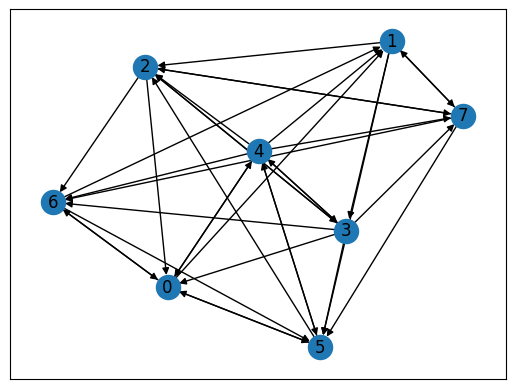

In [ ]:
# Crear grafica usando la biblioteca networkx.
g = nx.DiGraph()

# Añadir vertices.
N = 8
g.add_nodes_from(range(N))

# Agregar aristas.
g = añadir_conexiones(g=g, pr=0.6, random_state=1)

# Ver la gráfica.
nx.draw_networkx(g, with_labels=True)

In [ ]:
print('Nodos:', g.nodes())
print('\nNúmero de Nodos:', g.number_of_nodes())
print('\nTotal de Vertices:',g.number_of_edges())


Nodos: [0, 1, 2, 3, 4, 5, 6, 7]

Número de Nodos: 8

Total de Vertices: 35


In [ ]:
g.out_edges

OutEdgeView([(0, 1), (0, 4), (0, 5), (0, 6), (1, 2), (1, 3), (1, 5), (1, 7), (2, 0), (2, 3), (2, 6), (2, 7), (3, 0), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 0), (5, 2), (5, 4), (6, 0), (6, 1), (6, 5), (7, 1), (7, 2), (7, 5), (7, 6)])

In [ ]:
g.out_edges(1)

OutEdgeDataView([(1, 2), (1, 3), (1, 5), (1, 7)])

### Construir la matriz de transición

In [ ]:
a = nx.to_numpy_array(g)
a

array([[0., 1., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0.]])

In [ ]:
MT = a / a.sum(axis=1).reshape(-1,1)
np.round(MT, 2)

array([[0.  , 0.25, 0.  , 0.  , 0.25, 0.25, 0.25, 0.  ],
       [0.  , 0.  , 0.25, 0.25, 0.  , 0.25, 0.  , 0.25],
       [0.25, 0.  , 0.  , 0.25, 0.  , 0.  , 0.25, 0.25],
       [0.17, 0.  , 0.17, 0.  , 0.17, 0.17, 0.17, 0.17],
       [0.14, 0.14, 0.14, 0.14, 0.  , 0.14, 0.14, 0.14],
       [0.33, 0.  , 0.33, 0.  , 0.33, 0.  , 0.  , 0.  ],
       [0.33, 0.33, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.25, 0.25, 0.  , 0.  , 0.25, 0.25, 0.  ]])

Page Rank, utilizando caminata aleatoria

In [ ]:
def PageRank_caminata_aleatoria_01(g, largo_caminatas, caminatas):

      paginas = list(g.nodes())

      pesos_df = pd.DataFrame(columns = paginas,
                              index = ['Caminata_{}'.format(n+1) for n in range(caminatas)])

      for n in range(caminatas):
          # Inicializamos en 0 los cuenta para cada nodo
          cuenta = np.zeros_like(paginas)

          # Escojemos la primera página aleatoriamente, con probabilidad uniforme
          pag_selec = random.choice(paginas)
          cuenta[pag_selec] += 1
          vecinos = list(g.out_edges(pag_selec))   # Lista de vecinos a donde ir

          # Siguiente página, durante cada paso de la caminata
          z = 1
          while (z != largo_caminatas):
              if (len(vecinos) == 0):
                  # Si no hay vecinos escogemos cualquier página al azar
                  pag_selec = random.choice(paginas)
              else:
                  # Si sí hay vecinos escogemos uno al azar, con probabilidad uniforme
                  pag_selec = random.choice(vecinos)[1]


              cuenta[pag_selec] += 1
              vecinos = list(g.out_edges(pag_selec))
              z += 1

          # Obtenemos los pesos de cada nodo
          pesos = np.array(cuenta)/largo_caminatas                   # vector r

          # Guardamos los resultados
          pesos_df.loc[f'Caminata_{n+1}'] = pesos

      # Promediar y sacar el rank
      vec_r = pesos_df.mean()
      rank = vec_r.sort_values(ascending=False).to_dict()

      return pesos_df, rank

pesos_df, rank = PageRank_caminata_aleatoria_01(g, largo_caminatas = 400, caminatas= 1000)
rank

{5: 0.165065,
 0: 0.16156249999999978,
 2: 0.13718249999999985,
 6: 0.1276624999999998,
 1: 0.12287999999999995,
 4: 0.10922250000000004,
 7: 0.09483500000000004,
 3: 0.08159}

In [ ]:
pesos_df

,0,1,2,3,4,5,6,7
Caminata_1,0.185,0.1225,0.1375,0.0625,0.115,0.1575,0.16,0.06
Caminata_2,0.1375,0.1175,0.135,0.1,0.135,0.155,0.125,0.095
Caminata_3,0.13,0.1275,0.1425,0.075,0.115,0.1775,0.1375,0.095
Caminata_4,0.17,0.1325,0.135,0.0925,0.095,0.1775,0.1275,0.07
Caminata_5,0.155,0.1425,0.1525,0.085,0.09,0.15,0.14,0.085
...,...,...,...,...,...,...,...,...
Caminata_996,0.1475,0.1125,0.1575,0.0775,0.12,0.1725,0.105,0.1075
Caminata_997,0.1475,0.11,0.1525,0.095,0.1075,0.17,0.14,0.0775
Caminata_998,0.165,0.12,0.13,0.09,0.1175,0.1575,0.13,0.09
Caminata_999,0.16,0.095,0.1525,0.0975,0.085,0.1725,0.1575,0.08


In [ ]:
caminatas = 10
largo_caminatas = 20000

paginas = list(g.nodes())

caminatas_df = pd.DataFrame(columns = ['PaginaVisitada_{}'.format(n+1) for n in range(largo_caminatas)],
                            index = ['Caminata_{}'.format(c+1) for c in range(caminatas)])

caminatas_df['PaginaVisitada_1'] = np.random.choice(paginas, size=caminatas)


for n in range(2, largo_caminatas+1):
        caminatas_df['PaginaVisitada_{}'.format(n)] = caminatas_df['PaginaVisitada_{}'.format(n-1)].apply(lambda x: seleccion_siguiente_pagina(x, g, paginas))

caminatas_df

,PaginaVisitada_1,PaginaVisitada_2,PaginaVisitada_3,PaginaVisitada_4,PaginaVisitada_5,PaginaVisitada_6,PaginaVisitada_7,PaginaVisitada_8,PaginaVisitada_9,PaginaVisitada_10,...,PaginaVisitada_19991,PaginaVisitada_19992,PaginaVisitada_19993,PaginaVisitada_19994,PaginaVisitada_19995,PaginaVisitada_19996,PaginaVisitada_19997,PaginaVisitada_19998,PaginaVisitada_19999,PaginaVisitada_20000
Caminata_1,1,2,6,0,1,2,3,6,5,2,...,5,0,6,5,4,1,5,0,4,2
Caminata_2,1,3,4,6,5,2,0,6,0,4,...,5,4,7,5,4,7,5,4,0,5
Caminata_3,1,3,7,5,2,3,0,6,5,4,...,5,4,0,5,0,1,3,5,2,0
Caminata_4,6,1,7,1,2,3,5,2,3,6,...,6,0,4,5,2,6,0,1,5,0
Caminata_5,7,5,4,1,3,6,0,6,5,4,...,0,1,2,0,1,5,4,7,2,3
Caminata_6,6,0,5,0,5,4,2,0,1,5,...,4,7,6,0,4,6,0,4,1,5
Caminata_7,2,3,2,7,2,0,5,2,3,0,...,2,6,5,2,7,2,7,2,7,2
Caminata_8,6,1,2,0,1,5,0,5,0,4,...,3,4,6,5,0,5,2,0,5,2
Caminata_9,6,1,3,0,5,0,6,1,2,3,...,4,2,7,6,1,2,7,2,3,5
Caminata_10,6,1,5,0,1,2,0,6,5,4,...,5,4,2,3,4,2,0,4,6,5


In [ ]:
conteo_paginas_visitadas = caminatas_df.apply(lambda x: x.value_counts(), axis=1)
conteo_paginas_visitadas = conteo_paginas_visitadas.fillna(0).astype(int)
conteo_paginas_visitadas

,5,0,2,6,1,4,7,3
Caminata_1,3336,3295,2731,2529,2420,2197,1864,1628
Caminata_2,3435,3271,2721,2581,2398,2179,1857,1558
Caminata_3,3363,3213,2759,2508,2499,2124,1962,1572
Caminata_4,3390,3182,2752,2516,2424,2223,1919,1594
Caminata_5,3318,3208,2774,2554,2450,2164,1897,1635
Caminata_6,3339,3234,2795,2553,2398,2149,1880,1652
Caminata_7,3335,3132,2804,2483,2438,2241,1929,1638
Caminata_8,3417,3266,2770,2473,2381,2181,1904,1608
Caminata_9,3293,3193,2750,2559,2456,2171,1931,1647
Caminata_10,3252,3251,2744,2650,2418,2193,1845,1647


In [ ]:
rank = (conteo_paginas_visitadas/largo_caminatas).mean().sort_values(ascending=False).to_dict()
rank

{5: 0.16738999999999998,
 0: 0.161225,
 2: 0.13799999999999998,
 6: 0.12703,
 1: 0.12140999999999999,
 4: 0.10911,
 7: 0.09494,
 3: 0.08089500000000001}

## PageRank de las páginas de la Universidad de Stanford (2002)

* grafico https://snap.stanford.edu/data/web-Stanford.html
* matriz adyacente https://www.cise.ufl.edu/research/sparse/matrices/SNAP/web-Stanford.html


también esta disponible en esta [carpeta compartida](https://drive.google.com/file/d/1--oN8Onjb89--4bKc9Q7T5DsZmPAO2aQ/view?usp=sharing)

In [ ]:
from scipy.io import mmread

M = mmread("/content/drive/MyDrive/Datos/Web-Stanford/web-Stanford/web-Stanford.mtx")
M.shape

(281903, 281903)

In [ ]:
G = nx.from_scipy_sparse_array(M, parallel_edges=True, create_using=nx.DiGraph)
print('\nNúmero de Nodos:', G.number_of_nodes())
print('\nTotal de Vertices:',G.number_of_edges())


Número de Nodos: 281903

Total de Vertices: 2312497


In [ ]:
%%time
_, rank = PageRank_caminata_aleatoria_01(G, largo_caminatas= 10000, caminatas= 100)

pd.DataFrame.from_dict(rank, orient='index', columns=['Probabilidad'])

CPU times: user 30.4 s, sys: 1.39 s, total: 31.7 s
Wall time: 38.2 s


,Probabilidad
174664,0.019763
281771,0.014930
58047,0.014339
245764,0.014338
271408,0.010086
...,...
95801,0.000000
95802,0.000000
95803,0.000000
95804,0.000000


## **Aplicaciones**

**Redes electricas**:

* Chung F, Zhao W. PageRank and Random Walks on Graphs. En: Katona GOH, Schrijver A, Szőnyi T, Sági G, editores. Fete of Combinatorics and Computer Science [Internet]. Berlin, Heidelberg: Springer Berlin Heidelberg; 2010 [citado 28 de diciembre de 2020]. p. 43-62. (Tóth GF, Katona GOH, Lovász L, Pálfy PP, Recski A, Stipsicz A, et al. Bolyai Society Mathematical Studies; vol. 20). Disponible en: http://link.springer.com/10.1007/978-3-642-13580-4_3

**Redes sociales (epidemiología, difusión de noticias, moda, etc)**
* Mao C, Xiao W. A Comprehensive Algorithm for Evaluating Node Influences in Social Networks Based on Preference Analysis and Random Walk [Internet]. Vol. 2018, Complexity. Hindawi; 2018 [citado 28 de diciembre de 2020]. p. e1528341. Disponible en: https://www.hindawi.com/journals/complexity/2018/1528341/

**Detección de fraude**

* How to Perform Fraud Detection with Personalized Page Rank [Internet]. [citado 28 de diciembre de 2020]. Disponible en: https://www.sicara.ai/blog/2019-01-09-fraud-detection-personalized-page-rank








## **Conjuntos de Datos**

1. Stanford Large Network Dataset Collection [Internet]. [citado 28 de diciembre de 2020]. Disponible en: https://snap.stanford.edu/data/#email
